In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("delivery_time.csv")
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.shape

(21, 2)

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df=df.rename({"Delivery Time":"DeliveryTime", "Sorting Time":"SortingTime"},axis=True)
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [8]:
df.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

As skewness value is between -0.5 to 0.5, so we can keep original data 

In [9]:
df.kurt()

DeliveryTime    0.317960
SortingTime    -1.148455
dtype: float64

In [10]:
df[['DeliveryTime','SortingTime']].cov()

,DeliveryTime,SortingTime
DeliveryTime,25.754619,10.655810
SortingTime,10.655810,6.461905


In [11]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

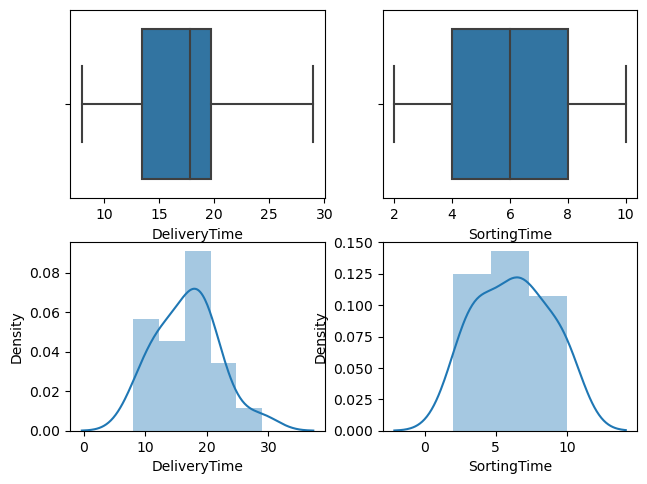

In [12]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['DeliveryTime'], ax = ax[0,0])
sns.boxplot(df['SortingTime'], ax=ax[0,1])
sns.distplot(df['DeliveryTime'], ax=ax[1,0])
sns.distplot(df['SortingTime'], ax=ax[1,1])

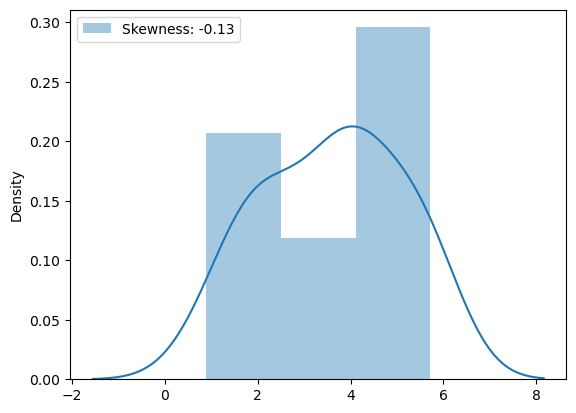

In [13]:
Boxcox_SortingTime = df["SortingTime"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_SortingTime= stats.boxcox(Boxcox_SortingTime)
Boxcox_SortingTime= pd.Series(Boxcox_SortingTime[0])
t=sns.distplot(Boxcox_SortingTime,label="Skewness: %.2f"%(Boxcox_SortingTime.skew()) )
t.legend()

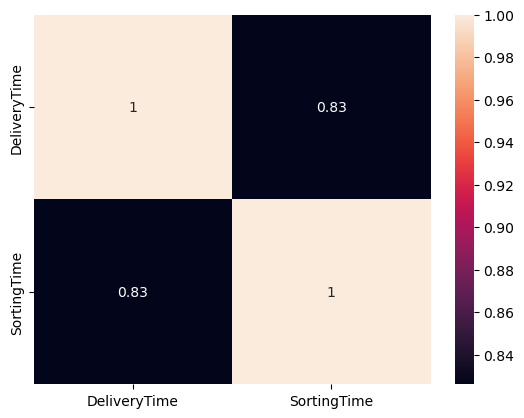

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

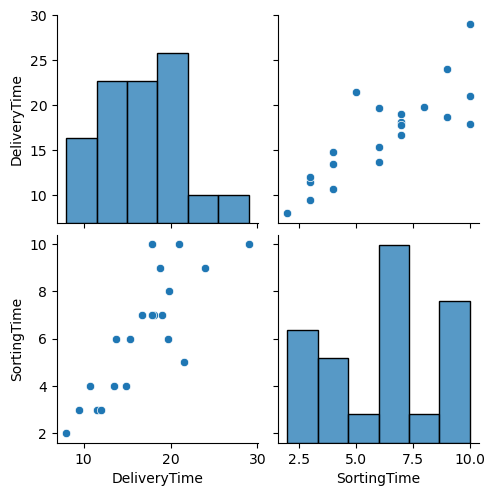

In [15]:
sns.pairplot(df)
plt.show()

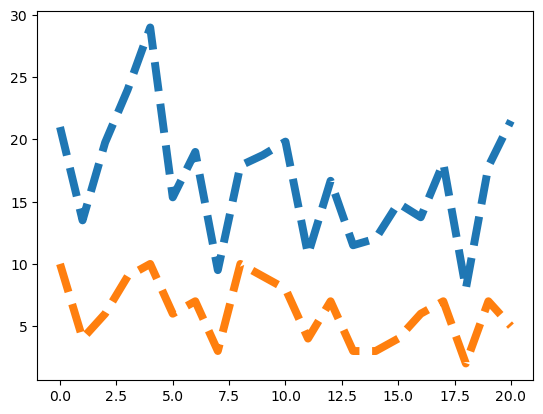

In [16]:
plt.plot(df, linestyle = '--', linewidth='5.7')
plt.show()

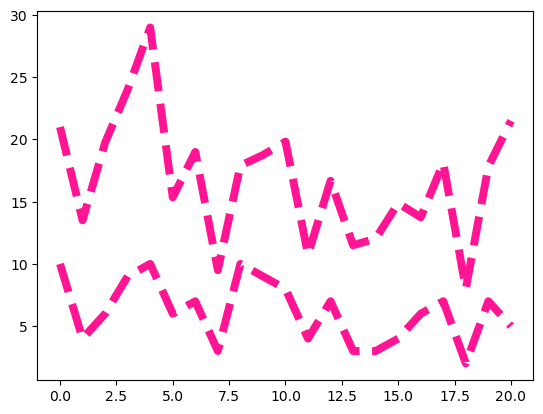

In [17]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')
plt.show()

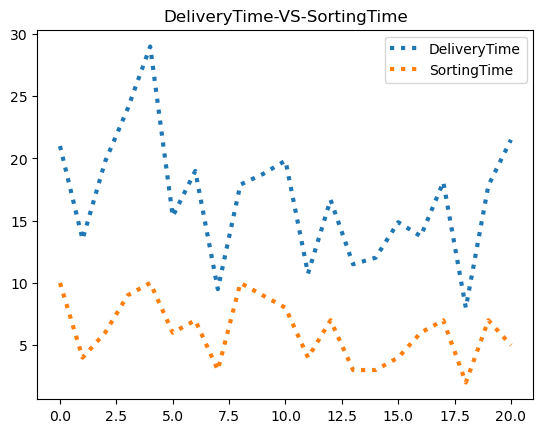

In [18]:
df.plot.line(linestyle = ':', linewidth='3')
plt.title('DeliveryTime-VS-SortingTime')
plt.show()

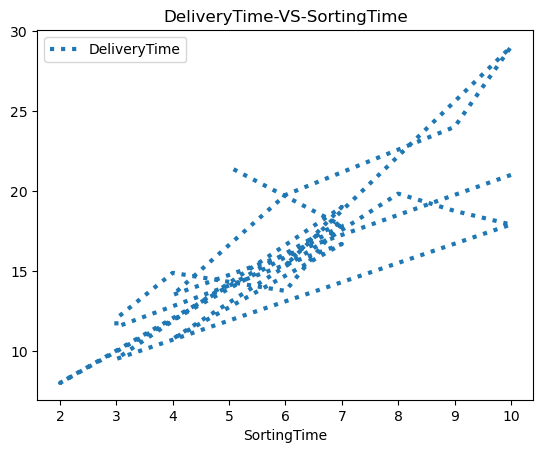

In [19]:
df = pd.DataFrame(data=df)
df.plot.line(x='SortingTime',linestyle = ':', linewidth='3')
plt.title('DeliveryTime-VS-SortingTime')
plt.show()

In [20]:
X=df.drop('SortingTime',axis=1)

In [21]:
y=df.SortingTime

In [22]:
X.head()

,DeliveryTime
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [23]:
y.head()

0    10
1     4
2     6
3     9
4    10
Name: SortingTime, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [26]:
print(X_train.shape)

(14, 1)


In [27]:
X_test.shape

(7, 1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR=LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

In [31]:
LR.intercept_ 

-0.42569345178048756

In [32]:
LR.coef_   

array([0.40293041])

In [33]:
y_pred=LR.predict(X_test)

In [34]:
y_pred

array([6.78676086, 4.20800625, 8.23731033, 5.01386706, 3.90580844,
       7.56441655, 4.42155936])

In [35]:
y_test

8     10
13     3
20     5
1      4
11     4
10     8
14     3
Name: SortingTime, dtype: int64

In [36]:
from sklearn import metrics

In [37]:
R2=metrics.r2_score(y_test,y_pred)

In [38]:
R2

0.41255895294328315

In [39]:
print(metrics.mean_absolute_error(y_test,y_pred))

1.5176795933621607


In [40]:
print(metrics.mean_squared_error(y_test,y_pred))

3.64453221031106


In [41]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.9090657951760228


In [42]:
error= y_test-y_pred

In [43]:
error

8     3.213239
13   -1.208006
20   -3.237310
1    -1.013867
11    0.094192
10    0.435583
14   -1.421559
Name: SortingTime, dtype: float64

In [44]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

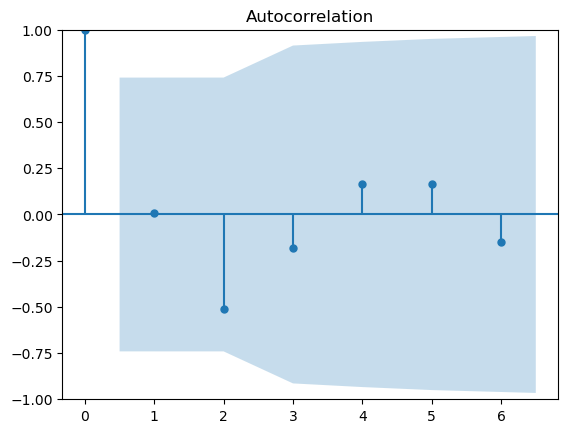

In [45]:
acf=plot_acf(error)
plt.show()

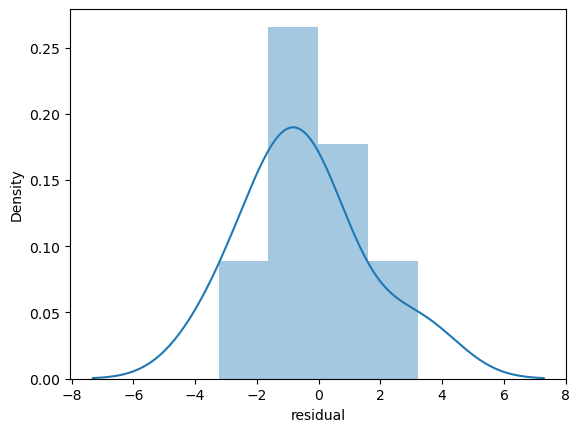

In [46]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

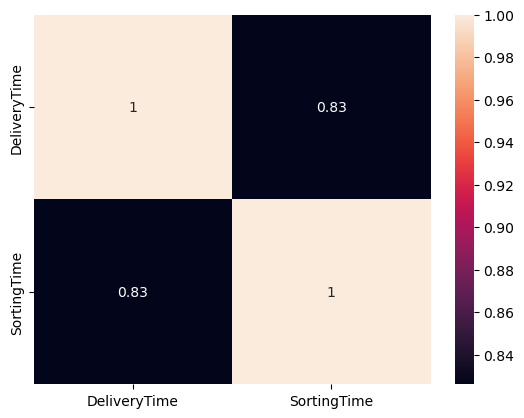

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [48]:
df['log_DeliveryTime']= np.log(df['DeliveryTime'])
df['log_SortingTime']=np.log(df['SortingTime'])
df.head()

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [49]:
df['sqrt_DeliveryTime']=np.sqrt(df['DeliveryTime'])
df['sqrt_SortingTime']=np.sqrt(df['SortingTime'])
df.head()

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime,sqrt_DeliveryTime,sqrt_SortingTime
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


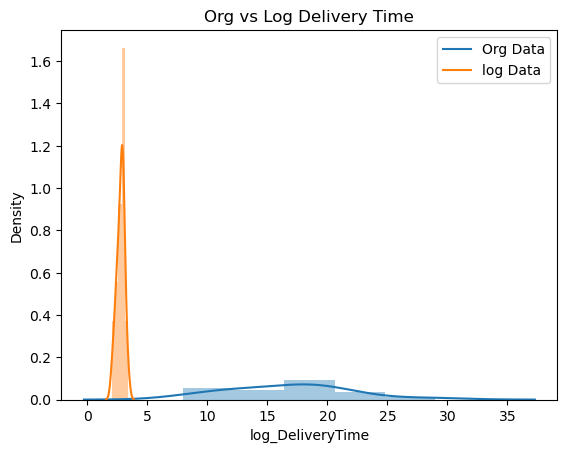

In [50]:
labels = ['Org Data', 'log Data']
sns.distplot(df['DeliveryTime'])
sns.distplot(df['log_DeliveryTime'])
plt.title('Org vs Log Delivery Time')
plt.legend(labels)
plt.show()

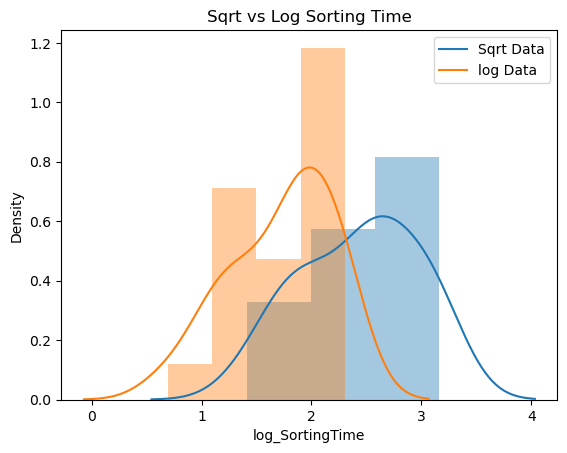

In [51]:
labels = ['Sqrt Data','log Data']
sns.distplot(df['sqrt_SortingTime'])
sns.distplot(df['log_SortingTime'])
plt.title('Sqrt vs Log Sorting Time')
plt.legend(labels)
plt.show()

# Building Model From The Data

## Creating Model with Original Data

In [52]:
org_model = smf.ols('DeliveryTime~SortingTime', data=df).fit()

In [53]:
print('\n T-Value of model wtin original value', '\n', org_model.tvalues)
print('\n P-Value of model wtin original value', '\n', org_model.pvalues)


 T-Value of model wtin original value 
 Intercept      3.823349
SortingTime    6.387447
dtype: float64

 P-Value of model wtin original value 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [54]:
org_model.rsquared

0.6822714748417231

As Accuracy of the model with original data is low, so we will try sqrt data

## Creating Model with Sqrt Data

In [55]:
sqrt_model = smf.ols('sqrt_DeliveryTime~sqrt_SortingTime', data=df).fit()

In [56]:
print('\n T-Value of model wtin log value','\n', sqrt_model.tvalues)
print('\n P-Value of model wtin log value','\n', sqrt_model.pvalues)


 T-Value of model wtin log value 
 Intercept           4.628248
sqrt_SortingTime    7.152817
dtype: float64

 P-Value of model wtin log value 
 Intercept           1.833621e-04
sqrt_SortingTime    8.475706e-07
dtype: float64


In [57]:
sqrt_model.rsquared

0.7292011987544665

By using sqrt value the accuracy of the model is increased from 68% to 73%

## Creating Model with Log Data

In [58]:
log_model = smf.ols('log_DeliveryTime~log_SortingTime', data=df).fit()

In [59]:
print('\n T-Value of model with log value','\n', org_model.tvalues)
print('\n P-Value of model with log value','\n', org_model.pvalues)


 T-Value of model with log value 
 Intercept      3.823349
SortingTime    6.387447
dtype: float64

 P-Value of model with log value 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [60]:
log_model.rsquared

0.77216134926874

By Using log value the accuracy of the model is increased from 73% to 77%